In [163]:
stmt = '''import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.spatial.distance import cdist
from sklearn.base import BaseEstimator, ClassifierMixin
import timeit

#%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

from sklearn.base import ClusterMixin

class Kmeans(BaseEstimator, ClusterMixin): 
    
    def __init__(self, k=3, metric='euclidean', max_iter=1000, random_state=None, init = 'random', modul_subset=50):
        """
        Инициализация метода
        :k - количество кластеров
        :metric - функция расстояния между объектами
        :max_iter - максиальное количество итераций
        :random_state - seed для инициализации генератора случайных чисел
        """
        
        self.k = k
        self.random_state = random_state
        self.metric = metric
        self.max_iter = max_iter
        self.init = init
        self.modul_subset = modul_subset

    def fit(self, X, y=None):
        """
        Процедура обучения k-means
        """
        
        # Инициализация генератора случайных чисел
        np.random.seed(self.random_state)
        
        # Массив с метками кластеров для каждого объекта из X
        self.labels = np.empty(X.shape[0])
        
        # Массив с центройдами кластеров
        self.centroids = np.empty((self.k, X.shape[1]))
        
        ## Your Code Here
        # ...
        if self.init=="random":
            #обычный (рандомный) выбор центроиды в блоке ограниченном точками
            for j in range(X.shape[1]):
                max=X[0][j]
                min=max
                for i in range(X.shape[0]):
                    if X[i][j] > max:
                        max=X[i][j]
                    if X[i][j] < min: 
                        min = X[i][j]
                for i in range(self.k):
                    self.centroids[i][j]=random.uniform(min,max)
            #print self.centroids
            
            
        
        if self.init=="kmeans++":
            #Задаю центроиды изначальные, как указано на этом сайте: https://ru.wikipedia.org/wiki/K-means%2B%2B
            for j in range(X.shape[1]):
                max=X[0][j]
                min=max
                for i in range(X.shape[0]):
                    if X[i][j] > max:
                        max=X[i][j]
                    if X[i][j] < min: 
                        min = X[i][j]
                self.centroids[0][j]=random.uniform(min,max)
            
            
            for j in range(1, self.k):
                old_sum=0
                for i in range(X.shape[0]):
                    old_sum=old_sum+cdist(X[i].reshape(1,-1), self.centroids[0].reshape(1,-1), metric=self.metric)**2
                next_centroids = random.uniform(0,old_sum)
                sum=0
                for i in range(X.shape[0]):
                    sum=sum+cdist(X[i].reshape(1,-1), self.centroids[0].reshape(1,-1), metric=self.metric)**2
                    if sum>next_centroids:
                        self.centroids[j]=X[i]
                        break
        e=0.0001            
        new_max=e+1
        #print "new_max_0 =", new_max
        k=1
        while (new_max>e):
            #print k
            
            
            #запоминаю старое положение центроид, чтобы вычислять дальнейшие смещения
            centroids_old=np.copy(self.centroids)
            
            
            
            #смотрю каким центроидам принадлежат точки
            self.labels=self.predict(X,y)
            
            
            for i in range(self.k):
                mask=(self.labels==i)
                indecies=np.where(mask)
                sum=0
                for j in range(X[indecies].shape[0]):
                    sum=sum+X[indecies][j]
                if X[indecies].shape[0]!=0:
                    sum=sum/X[indecies].shape[0]
                self.centroids[i]=sum
            #print self.centroids
            #print centroids_old
            #print self.centroids[0].reshape(1,-1),centroids_old[0].reshape(1,-1),
            new_max=cdist(self.centroids[0].reshape(1,-1),centroids_old[0].reshape(1,-1), metric=self.metric)
            #print "new_max_1 =", new_max
            for i in range(1,self.k):
                if cdist(self.centroids[i].reshape(1,-1), centroids_old[i].reshape(1,-1), metric=self.metric)>new_max:
                    new_max=cdist(self.centroids[i].reshape(1,-1),centroids_old[i].reshape(1,-1), metric=self.metric)
            k=k+1   
            if k>=self.max_iter:
                break
        return self.labels
        #if init==""
        #return self
        
                
                    
                    
                    
    def predict(self, X, y=None):
        labels=np.empty(X.shape[0])
        for i in range(X.shape[0]):
            #print X[i], self.centroids[0], X[i].shape
            min=cdist(X[i].reshape(1,-1), self.centroids[0].reshape(1,-1), metric=self.metric)
            labels[i]=0
            for j in range(1,self.k):
                if cdist(X[i].reshape(1,-1), self.centroids[j].reshape(1,-1), metric=self.metric)<min:
                    min=cdist(X[i].reshape(1,-1), self.centroids[j].reshape(1,-1), metric=self.metric)
                    labels[i]=j         
        return labels
    
    
    
    
class MiniBatchKMeans( Kmeans ):
            
    def sample(self, X, y=None):
        # Массив с метками кластеров для каждого объекта из X
        self.labels = np.empty(X.shape[0])
        
        # Массив с центройдами кластеров
        self.centroids = np.empty((self.k, X.shape[1]))
        
        
        if self.init=="random":
            for j in range(X.shape[1]):
                max=X[0][j]
                min=max
                for i in range(X.shape[0]):
                    if X[i][j] > max:
                        max=X[i][j]
                    if X[i][j] < min: 
                        min = X[i][j]
                for i in range(self.k):
                    self.centroids[i][j]=random.uniform(min,max)
                    
        if self.init=="kmeans++":
            #Задаю центроиды изначальные, как указано на этом сайте: https://ru.wikipedia.org/wiki/K-means%2B%2B
            for j in xrange(X.shape[1]):
                max=X[0][j]
                min=max
                for i in range(X.shape[0]):
                    if X[i][j] > max:
                        max=X[i][j]
                    if X[i][j] < min: 
                        min = X[i][j]
                self.centroids[0][j]=random.uniform(min,max)
            
            
            for j in xrange(1, self.k):
                old_sum=0
                for i in range(X.shape[0]):
                    old_sum=old_sum+cdist(X[i].reshape(1,-1), self.centroids[0].reshape(1,-1), metric=self.metric)**2
                next_centroids = random.uniform(0,old_sum)
                sum=0
                for i in range(X.shape[0]):
                    sum=sum+cdist(X[i].reshape(1,-1), self.centroids[0].reshape(1,-1), metric=self.metric)**2
                    if sum>next_centroids:
                        self.centroids[j]=X[i]
                        #print "было", X[i], self.centroids[j]
                        #X[i]=np.ones(X[i].shape)
                        #print "стало",X[i], self.centroids[j]
                        break;
                    
        
        
        self.labels=self.predict(X,y)
        #print self.labels
        #print "self.labels =",self.labels
        for j in xrange(self.max_iter):
            #выбираю подмножество из modul_subset элементов
            k=1
            number = np.zeros(self.k)
            sub_index = np.zeros(X.shape[0])
            for i in range(X.shape[0]):
                sub_index[i] = random.randint(0,1)
                if sub_index[i]==1:
                    k=k+1
                if k>=self.modul_subset:
                     break
            mask = (sub_index==1)
            index = np.where(mask)
            self.labels[mask]=self.predict(X[mask],y) #смотрю к каким центроидам принадлежит мое подмножество
            #print self.labels[mask]
            for i in range(X[mask].shape[0]):
                #делаю соответствующее смещение центроид в зависимости от принадлжености точек к ним
                number[int(self.labels[index[0][i]])]=number[int(self.labels[index[0][i]])]+1
                n=1/number[int(self.labels[index[0][i]])]
                self.centroids[int(self.labels[index[0][i]])]=(1-n)*self.centroids[int(self.labels[index[0][i]])]+n*X[index[0][i]]
                #print np.where(mask)
        return self.labels
n_samples = 100
'''

In [110]:
from sklearn.datasets import make_blobs

<type 'numpy.ndarray'>
[ 1.  0.  1.  0.  1.  1.  0.  1.  1.  1.  0.  1.  1.  1.  1.  1.  1.  1.
  0.  1.  1.  1.  0.  1.  1.  1.  1.  1.  1.  0.  0.  1.  1.  1.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  1.  2.  2.  1.  2.  2.  2.  1.  2.  2.  2.
  2.  2.  2.  2.  2.  1.  2.  2.  2.  2.  2.  1.  1.  2.  2.  2.  2.  2.
  2.  2.  2.  0.  2.  2.  2.  2.  2.  2.  2.  0.  2.  2.  2.  0.  2.  2.
  0.  0.  2.  0.  2.  2.  2.  2.  2.  2.]
self.labels = [ 1.  0.  1.  0.  1.  1.  0.  1.  1.  1.  0.  1.  1.  1.  1.  1.  1.  1.
  0.  1.  1.  1.  0.  1.  1.  1.  1.  1.  1.  0.  0.  1.  1.  1.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  1.  2.  2.  1.  2.  2.  2.  1.  2.  2.  2.
  2.  2.  2.  2.  2.  1.  2.  2.  2.  2.  2.  1.  1.  2.  2.  2.  2.  2.
  2.  2.  2.  0.  2.  2.  2.  2.  2.  2.  2.  0.  2.  2.  2.  0.  2.  2.
  0.  0.  2.  0.  2.  2.  2.  2.  2.  2.]


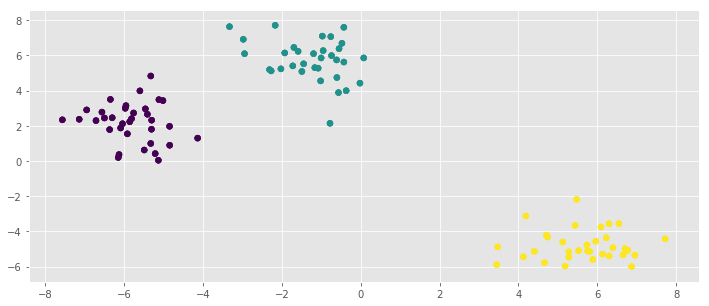

In [71]:
X, y = make_blobs(n_samples=100, n_features=2, centers=3, cluster_std=1, 
           center_box=(-10.0, 10.0), shuffle=False, random_state=1234)

plt.scatter(X[:,0], X[:, 1], c=y)
print type(X)
model = MiniBatchKMeans()
y = model.sample(X, y)
plt.scatter(X[:,0], X[:, 1], c=y) #MiniBatchKMeans random на простых данных#

In [205]:
import numpy as np
setup = '''from sklearn.datasets import make_blobs
n_samples=  100
X, y = make_blobs(n_samples=n_samples, n_features=2, centers=3, cluster_std=1, 
           center_box=(-10.0, 10.0), shuffle=False, random_state=1234)
print n_samples
model = MiniBatchKMeans()
y=model.sample(X, y)'''
a='1'
n = np.array([[0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0]], dtype = float)

print n
for i in xrange(9):
    n[1][i] = int(a+'00')
    n[0][i] = float(timeit.Timer(stmt = setup,setup = stmt).repeat(repeat = 1, number = 1).pop())
    a=str(int(a)+10)
    setup = setup[:51]+a+setup[53:]
a = str(int(a)+200)
n[1][9] = int(a + '00')
setup = setup[:50]+a+setup[53:]
n[0][9] = float(timeit.Timer(stmt = setup,setup = stmt).repeat(repeat = 1, number = 1).pop())
print n


[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]
100
1100
2100
3100
4100
5100
6100
7100
8100
29100
[[  1.90010500e+00   2.05305409e+00   2.17095399e+00   2.09250903e+00
    1.93884397e+00   2.22003102e+00   2.22146201e+00   2.32861519e+00
    2.34659982e+00   3.62772512e+00]
 [  1.00000000e+02   1.10000000e+03   2.10000000e+03   3.10000000e+03
    4.10000000e+03   5.10000000e+03   6.10000000e+03   7.10000000e+03
    8.10000000e+03   2.91000000e+04]]


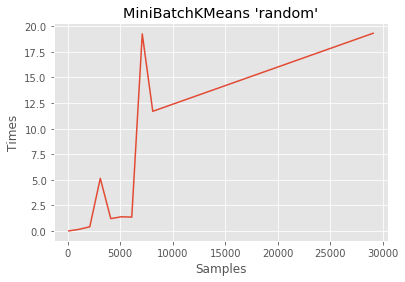

In [223]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()
plt.ylabel("Times")
plt.xlabel("Samples")
plt.title("MiniBatchKMeans 'random'")
graph = plt.plot(n[1],n[0])

In [213]:
import numpy as np
setup = '''from sklearn.datasets import make_blobs
n_samples=  100
X, y = make_blobs(n_samples=n_samples, n_features=2, centers=3, cluster_std=1, 
           center_box=(-10.0, 10.0), shuffle=False, random_state=1234)
print n_samples
model = MiniBatchKMeans()
model.init = "kmeans++"
y=model.sample(X, y)'''
a='1'
n = np.array([[0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0]], dtype = float)

print n
for i in xrange(9):
    n[1][i] = int(a+'00')
    n[0][i] = float(timeit.Timer(stmt = setup,setup = stmt).repeat(repeat = 1, number = 1).pop())
    a=str(int(a)+10)
    setup = setup[:51]+a+setup[53:]
a = str(int(a)+200)
n[1][9] = int(a + '00')
setup = setup[:50]+a+setup[53:]
n[0][9] = float(timeit.Timer(stmt = setup,setup = stmt).repeat(repeat = 1, number = 1).pop())
print n


[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]
100
1100
2100
3100
4100
5100
6100
7100
8100
29100
[[  1.77993202e+00   2.24686503e+00   2.19809580e+00   2.49082208e+00
    2.29521489e+00   1.98540998e+00   2.03583407e+00   2.45026612e+00
    2.66204810e+00   4.06225896e+00]
 [  1.00000000e+02   1.10000000e+03   2.10000000e+03   3.10000000e+03
    4.10000000e+03   5.10000000e+03   6.10000000e+03   7.10000000e+03
    8.10000000e+03   2.91000000e+04]]


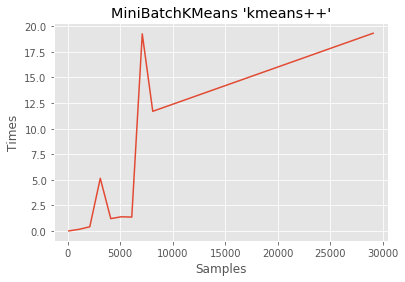

In [222]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()
plt.ylabel("Times")
plt.xlabel("Samples")
plt.title("MiniBatchKMeans 'kmeans++'")
graph = plt.plot(n[1],n[0])

[ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  0.  2.  2.  2.  2.  2.  2.
  2.  0.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
self.labels = [ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  0.  2.  2.  2.  2.  2.  2.
  2.  0.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


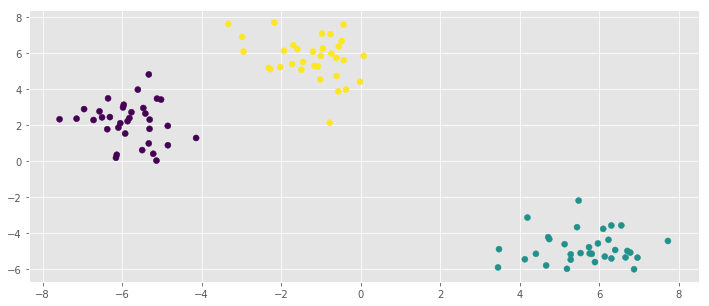

In [73]:
model = MiniBatchKMeans()
model.init="kmeans++"
y=model.sample(X, y)
plt.scatter(X[:,0], X[:, 1], c=y)  #MiniBatchKMeans kmeans++ на простых данных#

In [218]:
import numpy as np
setup = '''from sklearn.datasets import make_blobs
n_samples=  100
X, y = make_blobs(n_samples=n_samples, n_features=2, centers=3, cluster_std=1, 
           center_box=(-10.0, 10.0), shuffle=False, random_state=1234)
print n_samples
model = Kmeans()
y=model.fit(X, y)'''
a='1'
n = np.array([[0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0]], dtype = float)

print n
for i in xrange(9):
    n[1][i] = int(a+'00')
    n[0][i] = float(timeit.Timer(stmt = setup,setup = stmt).repeat(repeat = 1, number = 1).pop())
    a=str(int(a)+10)
    setup = setup[:51]+a+setup[53:]
a = str(int(a)+200)
n[1][9] = int(a + '00')
setup = setup[:50]+a+setup[53:]
n[0][9] = float(timeit.Timer(stmt = setup,setup = stmt).repeat(repeat = 1, number = 1).pop())
print n

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]
100
1100
2100
3100
4100
5100
6100
7100
8100
29100
[[  1.69150829e-02   1.75146103e-01   4.21838045e-01   5.15144992e+00
    1.21695089e+00   1.39677596e+00   1.36700606e+00   1.92552609e+01
    1.16970751e+01   1.93188970e+01]
 [  1.00000000e+02   1.10000000e+03   2.10000000e+03   3.10000000e+03
    4.10000000e+03   5.10000000e+03   6.10000000e+03   7.10000000e+03
    8.10000000e+03   2.91000000e+04]]


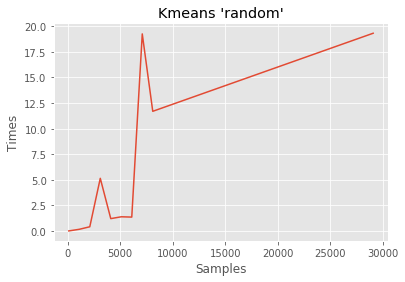

In [221]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()
plt.ylabel("Times")
plt.xlabel("Samples")
plt.title("Kmeans 'random'")
graph = plt.plot(n[1],n[0])

In [227]:
import numpy as np
setup = '''from sklearn.datasets import make_blobs
n_samples=  100
X, y = make_blobs(n_samples=n_samples, n_features=2, centers=3, cluster_std=1, 
           center_box=(-10.0, 10.0), shuffle=False, random_state=1234)
print n_samples
model = Kmeans()
model.init = "kmeans++"
y=model.fit(X, y)'''
a='1'
n = np.array([[0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0]], dtype = float)

print n
for i in xrange(9):
    n[1][i] = int(a+'00')
    n[0][i] = float(timeit.Timer(stmt = setup,setup = stmt).repeat(repeat = 1, number = 1).pop())
    a=str(int(a)+10)
    setup = setup[:51]+a+setup[53:]
a = str(int(a)+200)
n[1][9] = int(a + '00')
setup = setup[:50]+a+setup[53:]
n[0][9] = float(timeit.Timer(stmt = setup,setup = stmt).repeat(repeat = 1, number = 1).pop())
print n

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]
100
1100
2100
3100
4100
5100
6100
7100
8100
29100
[[  2.19700336e-02   1.95964098e-01   3.97062063e-01   3.61638594e+00
    9.43916082e-01   1.20526779e+01   1.51527500e+00   1.97198415e+00
    2.74099302e+00   5.70552680e+02]
 [  1.00000000e+02   1.10000000e+03   2.10000000e+03   3.10000000e+03
    4.10000000e+03   5.10000000e+03   6.10000000e+03   7.10000000e+03
    8.10000000e+03   2.91000000e+04]]


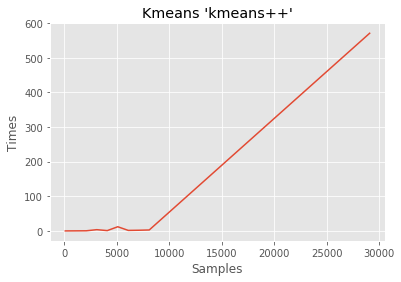

In [228]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()
plt.ylabel("Times")
plt.xlabel("Samples")
plt.title("Kmeans 'kmeans++'")
graph = plt.plot(n[1],n[0])

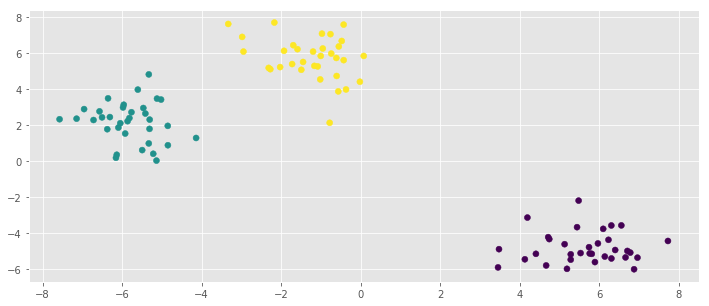

In [225]:
model=Kmeans()
y = model.fit(X,y)
model.init = "kmeans++"
plt.scatter(X[:,0], X[:, 1], c=y) #Kmeans kmeans++ на простых данных#

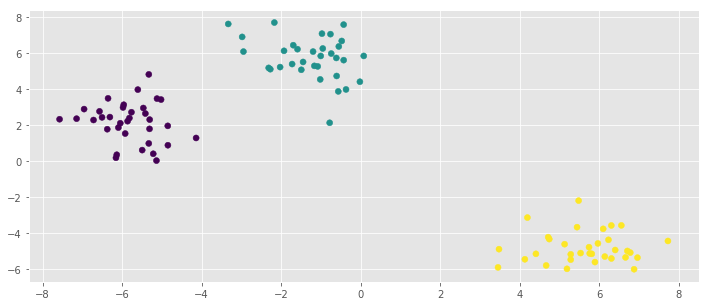

In [75]:
model=Kmeans()
y = model.fit(X,y)
plt.scatter(X[:,0], X[:, 1], c=y) #Kmeans random на простых данных#

In [85]:
df_sns = pd.read_csv('snsdata.csv', sep=',')

del df_sns['age']
del df_sns['gender']
del df_sns['friends']
del df_sns['gradyear']

x=df_sns.columns
#print x
for i in range(x.shape[0]):
    #print x[i]
    df_sns[x[i]] = (df_sns[x[i]]-df_sns[x[i]].mean())/(df_sns[x[i]].max()-df_sns[x[i]].min())
    df_sns[x[i]]
#print df_sns.head()
#print df_sns.loc[1].values
array=np.empty((df_sns.shape[0],df_sns.shape[1]))
for i in range(df_sns.shape[0]):
    array[i]=df_sns.loc[i].values
print array
model=MiniBatchKMeans()
model.init = "kmeans++"
model.k = 9
y = model.sample(array, y)
print model.centroids
print y.shape
print y[y==2].shape

[[-0.01113889 -0.01682    -0.00825062 ..., -0.00815952 -0.01099583
  -0.00377708]
 [-0.01113889  0.04984667 -0.00825062 ..., -0.00815952 -0.01099583
  -0.00377708]
 [-0.01113889  0.04984667 -0.00825062 ...,  0.06326905 -0.01099583
  -0.00377708]
 ..., 
 [-0.01113889  0.04984667 -0.00825062 ..., -0.00815952 -0.01099583
  -0.00377708]
 [-0.01113889 -0.01682    -0.00825062 ..., -0.00815952 -0.01099583
  -0.00377708]
 [ 0.07219444 -0.01682    -0.00825062 ..., -0.00815952 -0.01099583
  -0.00377708]]
[ 4.  4.  3. ...,  4.  4.  7.]
self.labels = [ 4.  4.  3. ...,  4.  4.  7.]
[[  3.21781097e-01   9.69925098e-02   3.84382952e-02   1.92463257e-01
    8.57398514e-01   5.38692320e-01   3.17851861e-01   4.15427972e-01
    3.28022222e-01   1.80765107e-01   1.96387400e-01   5.83784041e-01
    2.29303346e-01   3.34520412e-01   1.05230837e-01   9.60269715e-02
    9.09846406e-01   4.99408753e-01   4.63137200e-02   1.13380754e-01
    6.06512604e-01   6.95399245e-01   5.92219504e-01   6.10771444e-01
   -

In [86]:
print y[y==1].shape
print y[y==0].shape

(1723,)
(0,)


Обычный kmeans плох тем, что три точки берутся рандомно. Очевидно, что в такой ситуации больше проблемных случаев.
kmeans++ уже гораздо лучше смотрится, однако при большом кол-ве точек длительность работы алгоритма увеличивается значительно! В такой ситуации хорошо работает minibatchKmeans, однако при маленьком кол-ве сплайнов работа гораздо хуже...

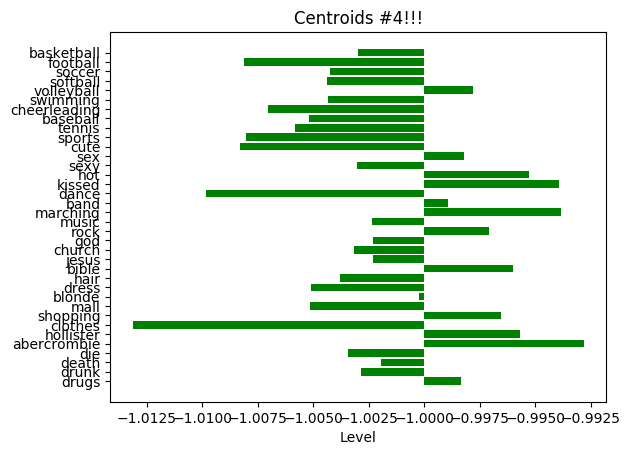

In [100]:
plt.rcdefaults()
fig, ax = plt.subplots()
# Example data
people = x
y_pos = np.arange(len(x))
performance = model.centroids[4]
error = model.centroids[4]
#, xerr=error, align='center'
ax.barh(y_pos, performance,left = -1, color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Level')
ax.set_title('Centroids #4!!!')

plt.show(ax)
#сложно#

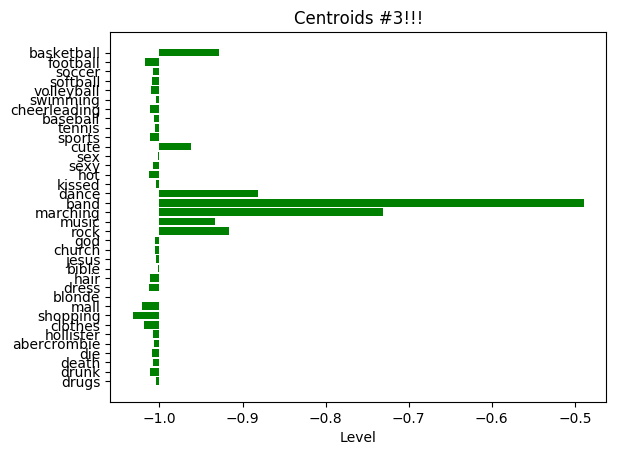

In [101]:
plt.rcdefaults()
fig, ax = plt.subplots()
# Example data
people = x
y_pos = np.arange(len(x))
performance = model.centroids[3]
error = model.centroids[3]
#, xerr=error, align='center'
ax.barh(y_pos, performance,left = -1, color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Level')
ax.set_title('Centroids #3!!!')

plt.show(ax)
#увлекаются музыкой#

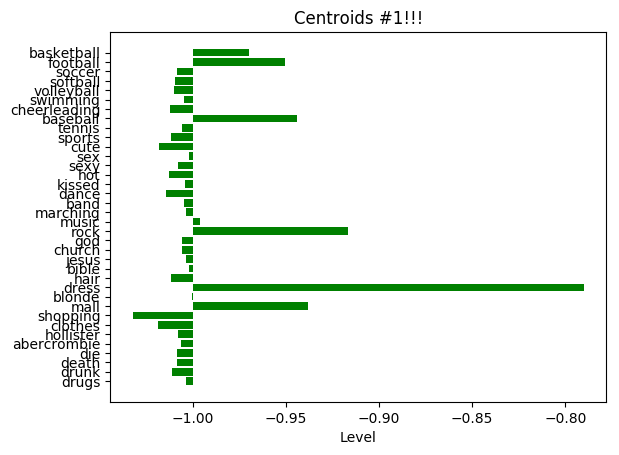

In [102]:
plt.rcdefaults()
fig, ax = plt.subplots()
# Example data
people = x
y_pos = np.arange(len(x))
performance = model.centroids[1]
error = model.centroids[1]
#, xerr=error, align='center'
ax.barh(y_pos, performance,left = -1, color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Level')
ax.set_title('Centroids #1!!!')

plt.show(ax)
#люди на стиле#

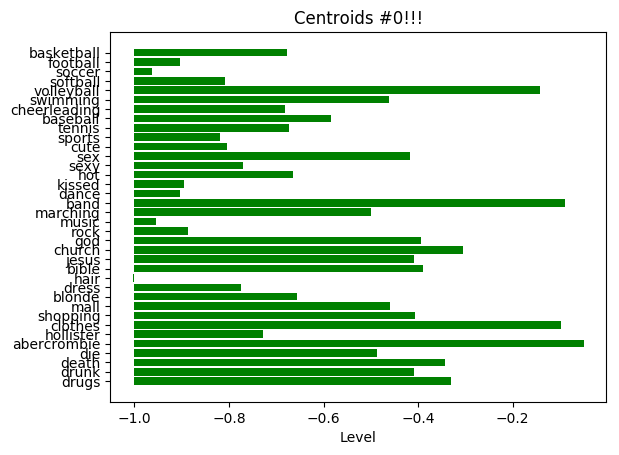

In [103]:
plt.rcdefaults()
fig, ax = plt.subplots()
# Example data
people = x
y_pos = np.arange(len(x))
performance = model.centroids[0]
error = model.centroids[0]
#, xerr=error, align='center'
ax.barh(y_pos, performance,left = -1, color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Level')
ax.set_title('Centroids #0!!!')

plt.show(ax)
#люди, которые занимаются почти всем, очень разносторонние#

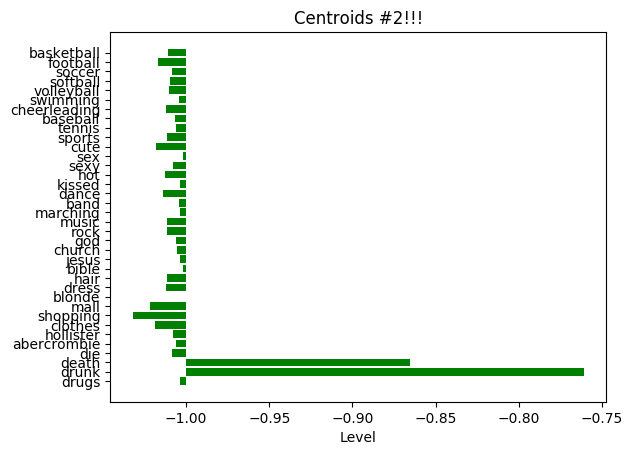

In [104]:
plt.rcdefaults()
fig, ax = plt.subplots()
# Example data
people = x
y_pos = np.arange(len(x))
performance = model.centroids[2]
error = model.centroids[2]
#, xerr=error, align='center'
ax.barh(y_pos, performance,left = -1, color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Level')
ax.set_title('Centroids #2!!!')

plt.show(ax)
#люди, которые много пьют#

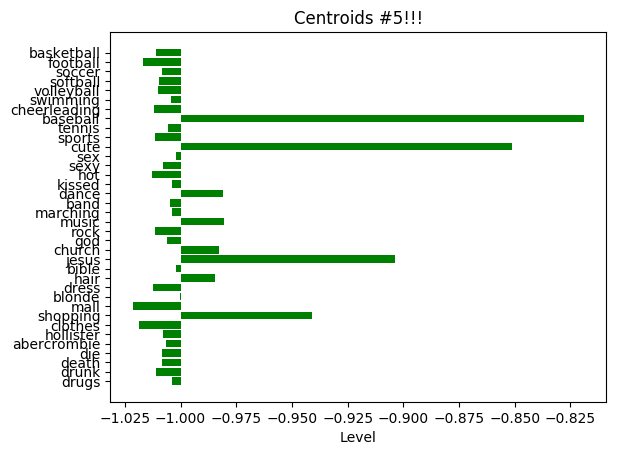

In [96]:
plt.rcdefaults()
fig, ax = plt.subplots()
# Example data
people = x
y_pos = np.arange(len(x))
performance = model.centroids[5]
error = model.centroids[5]
#, xerr=error, align='center'
ax.barh(y_pos, performance,left = -1, color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Level')
ax.set_title('Centroids #5!!!')

plt.show(ax)
#люди, которые увлекаются бейсболом#

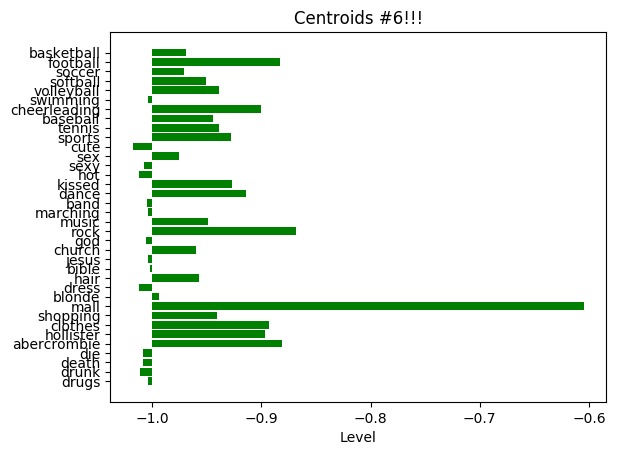

In [97]:
plt.rcdefaults()
fig, ax = plt.subplots()
# Example data
people = x
y_pos = np.arange(len(x))
performance = model.centroids[6]
error = model.centroids[6]
#, xerr=error, align='center'
ax.barh(y_pos, performance,left = -1, color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Level')
ax.set_title('Centroids #6!!!')

plt.show(ax)
#сложно понять (ну это что-то из обычных людей)#

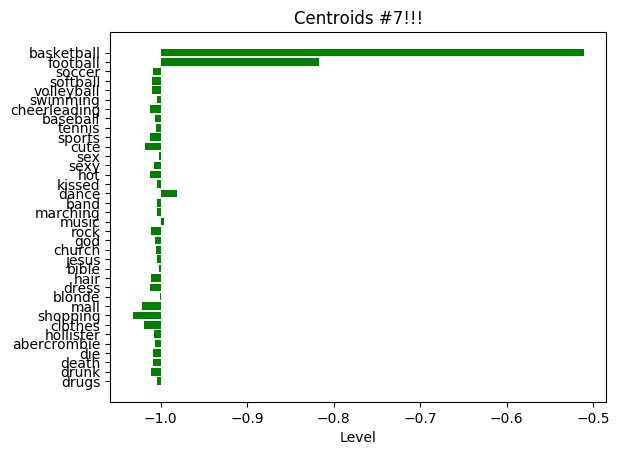

In [98]:
plt.rcdefaults()
fig, ax = plt.subplots()
# Example data
people = x
y_pos = np.arange(len(x))
performance = model.centroids[7]
error = model.centroids[7]
#, xerr=error, align='center'
ax.barh(y_pos, performance,left = -1, color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Level')
ax.set_title('Centroids #7!!!')

plt.show(ax)
#люди, которые очень любят баскетбол#

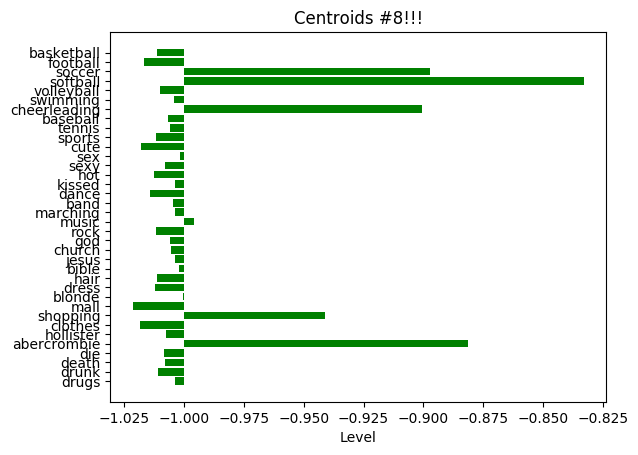

In [99]:
plt.rcdefaults()
fig, ax = plt.subplots()
# Example data
people = x
y_pos = np.arange(len(x))
performance = model.centroids[8]
error = model.centroids[8]
#, xerr=error, align='center'
ax.barh(y_pos, performance,left = -1, color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Level')
ax.set_title('Centroids #8!!!')

plt.show(ax)
#люди, которым нравится тема с футболом#